# Regression model evaluation metrics

    The MSE, MAE, RMSE, and R-Squared metrics are mainly used to evaluate the prediction error rates and model performance in regression analysis.
    
1. MAE (Mean absolute error) represents the difference between the original and predicted values extracted by averaged the absolute difference over the data set.

2. MSE (Mean Squared Error) represents the difference between the original and predicted values extracted by squared the average difference over the data set.

3. RMSE (Root Mean Squared Error) is the error rate by the square root of MSE. .

4. R-squared (Coefficient of determination) represents the coefficient of how well the values fit compared to the original values. The value from 0 to 1 interpreted as percentages. The higher the value is, the better the model is.1(100%) is best score and 0(0%) is worst score

The above metrics can be expressed,










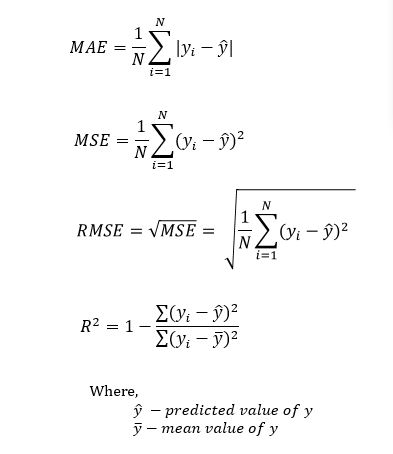

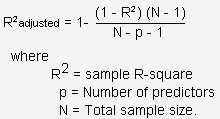

In [42]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [43]:
df = pd.read_csv('placement.csv')

In [44]:
df.head()
df.shape

(200, 2)

Text(0, 0.5, 'Package(in lpa)')

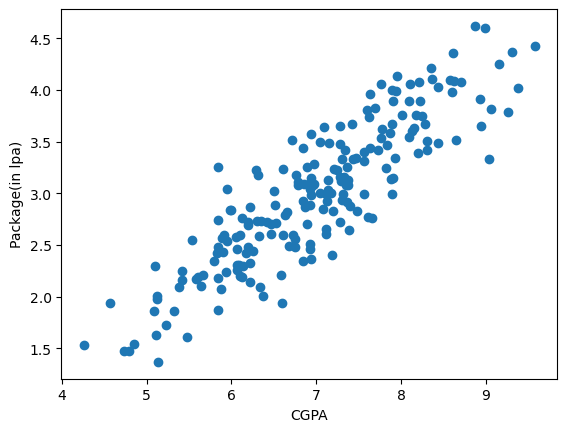

In [45]:
plt.scatter(df['cgpa'],df['package'])
plt.xlabel('CGPA')
plt.ylabel('Package(in lpa)')

In [46]:
X = df.iloc[:,0:1]
y = df.iloc[:,-1]

In [47]:
X

,cgpa
0,6.89
1,5.12
2,7.82
3,7.42
4,6.94
...,...
195,6.93
196,5.89
197,7.21
198,7.63


In [48]:
y

0      3.26
1      1.98
2      3.25
3      3.67
4      3.57
       ... 
195    2.46
196    2.57
197    3.24
198    3.96
199    2.33
Name: package, Length: 200, dtype: float64

In [49]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [50]:
from sklearn.linear_model import LinearRegression

In [51]:
lr = LinearRegression()

In [52]:
lr.fit(X_train,y_train)

LinearRegression()

Text(0, 0.5, 'Package(in lpa)')

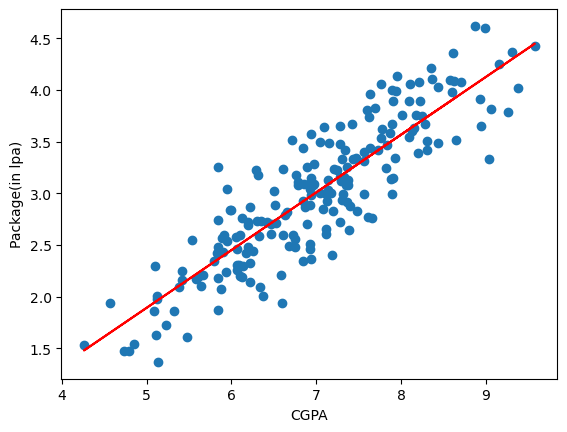

In [53]:
plt.scatter(df['cgpa'],df['package'])
plt.plot(X_train,lr.predict(X_train),color='red')
plt.xlabel('CGPA')
plt.ylabel('Package(in lpa)')

In [54]:
lr.score(X_test,y_test)

0.780730147510384

In [55]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [56]:
y_pred = lr.predict(X_test)

In [57]:
y_pred

array([3.89111601, 3.09324469, 2.38464568, 2.57434935, 1.6537286 ,
       1.77647803, 2.07219258, 2.93143862, 3.76278706, 2.93701814,
       4.09197872, 3.51170867, 2.97049525, 2.40138424, 3.18809652,
       3.46707251, 1.94386362, 3.24389172, 2.97607477, 3.41685683,
       2.55761079, 3.16577844, 2.85890486, 3.12114229, 3.68467378,
       2.8700639 , 3.49497011, 3.34432308, 3.91901361, 1.96060218,
       3.65119666, 3.2104146 , 3.74046898, 2.7863711 , 2.78079158,
       3.27178932, 3.52844723, 2.61340599, 2.65804215, 2.71383735])

In [58]:
y_test.values

array([4.1 , 3.49, 2.08, 2.33, 1.94, 1.48, 1.86, 3.09, 4.21, 2.87, 3.65,
       4.  , 2.89, 2.6 , 2.99, 3.25, 1.86, 3.67, 2.37, 3.42, 2.48, 3.65,
       2.6 , 2.83, 4.08, 2.56, 3.58, 3.81, 4.09, 2.01, 3.63, 2.92, 3.51,
       1.94, 2.21, 3.34, 3.34, 3.23, 2.01, 2.61])

In [18]:
print("MAE",mean_absolute_error(y_test,y_pred))

MAE 0.2884710931878175


In [19]:
print("MSE",mean_squared_error(y_test,y_pred))

MSE 0.12129235313495527


In [59]:
print("RMSE",np.sqrt(mean_squared_error(y_test,y_pred)))

RMSE 0.34827051717731616


In [60]:
print("MSE",r2_score(y_test,y_pred))
r2 = r2_score(y_test,y_pred)

MSE 0.780730147510384


In [22]:
# Adjusted R2 score
X_test.shape

(40, 1)

In [23]:
1 - ((1-r2)*(40-1)/(40-1-1))

0.7749598882343415

# Example 02

In [24]:
new_df1 = df.copy()
new_df1['random_feature'] = np.random.random(200)

new_df1 = new_df1[['cgpa','random_feature','package']]
new_df1.head()

,cgpa,random_feature,package
0,6.89,0.263310,3.26
1,5.12,0.722571,1.98
2,7.82,0.411366,3.25
3,7.42,0.471910,3.67
4,6.94,0.636996,3.57


Text(0, 0.5, 'Package(in lpa)')

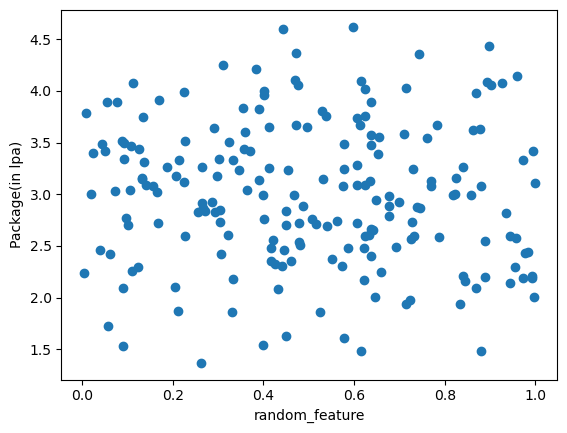

In [25]:
plt.scatter(new_df1['random_feature'],new_df1['package'])
plt.xlabel('random_feature')
plt.ylabel('Package(in lpa)')

In [26]:
X = new_df1.iloc[:,0:2]
y = new_df1.iloc[:,-1]

In [27]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [28]:
lr = LinearRegression()

In [29]:
lr.fit(X_train,y_train)

LinearRegression()

In [30]:
y_pred = lr.predict(X_test)

In [31]:
print("R2 score",r2_score(y_test,y_pred))
r2 = r2_score(y_test,y_pred)

R2 score 0.7784412747176082


In [32]:
1 - ((1-r2)*(40-1)/(40-1-2))

0.7664651274050465

In [33]:
new_df2 = df.copy()

new_df2['iq'] = new_df2['package'] + (np.random.randint(-12,12,200)/10)

new_df2 = new_df2[['cgpa','iq','package']]

In [34]:
new_df2.sample(5)

,cgpa,iq,package
73,8.44,2.83,4.03
101,6.71,3.42,3.52
162,5.53,2.05,2.55
70,5.79,1.95,2.35
20,7.28,3.16,3.16


Text(0, 0.5, 'Package(in lpa)')

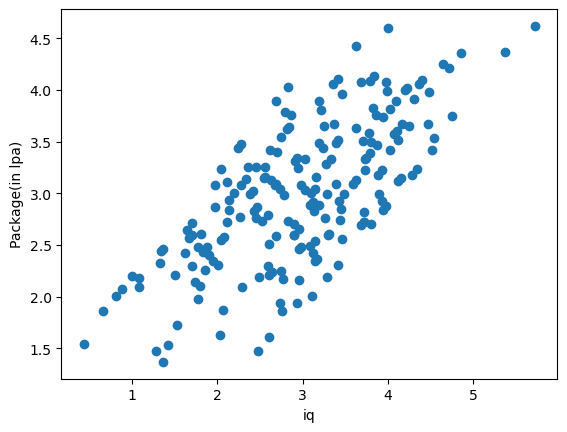

In [35]:
plt.scatter(new_df2['iq'],new_df2['package'])
plt.xlabel('iq')
plt.ylabel('Package(in lpa)')

In [36]:
np.random.randint(-100,100)

21

In [37]:
X = new_df2.iloc[:,0:2]
y = new_df2.iloc[:,-1]

In [38]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [39]:
lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)

In [40]:
print("R2 score",r2_score(y_test,y_pred))
r2 = r2_score(y_test,y_pred)

R2 score 0.8178124729549759


In [41]:
1 - ((1-r2)*(40-1)/(40-1-2))

0.8079644985201098